# 01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Set path

path = r'C:\Users\Marce\careerfoundry\Instacart Basket Analysis'

In [3]:
# Import dataframe from pickle

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'allinone.pkl'))

In [4]:
# View all columns

pd.set_option('display.max_columns', None)

In [5]:
df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest/slowest days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,freq_cust,Gender,State,Age,Join date,Dependants,fam_status,Income,Region,Relevance,Parent_Status
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
15,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
16,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
18,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent


In [6]:
#new dataframe to work with

df_new =  df

In [7]:
df_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest/slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'freq_cust', 'Gender', 'State', 'Age',
       'Join date', 'Dependants', 'fam_status', 'Income', 'Region',
       'Relevance', 'Parent_Status'],
      dtype='object')

In [8]:
#creating a list with if conditions to separate states in geographic regions

result = []

for value in df_new["State"]:
  if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
    result.append("Northeast")
  elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
   result.append("Midwest")
  elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
   result.append("South")
  elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
   result.append("West")

In [9]:
#creating a new column from the list

df_new["Region"] = result

In [10]:
df_new["Region"].value_counts(dropna = False)

South        8127783
West         6257904
Midwest      5710796
Northeast    4314683
Name: Region, dtype: int64

In [11]:
#creating a crosstab between region and spending_flag

crosstab = pd.crosstab(df_new['Region'], df_new['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,118248,5592548
Northeast,82029,4232654
South,157899,7969884
West,120826,6137078


In [13]:
# creating a list for a new column "Relevance"
####what do you call an elephant that doesn't matter?

result=[]

for value in df_new["order_number"]:
  if value < 5:
    result.append("Irrelephant")
  elif value >=5:
    result.append("Relevant")
  else:
    result.append("Problem")

In [14]:
# new column based on list

df_new['Relevance'] = result

In [15]:
df_new['Relevance'].value_counts(dropna = False) 

Relevant    24411166
Name: Relevance, dtype: int64

In [16]:
df_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest/slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'freq_cust', 'Gender', 'State', 'Age',
       'Join date', 'Dependants', 'fam_status', 'Income', 'Region',
       'Relevance', 'Parent_Status'],
      dtype='object')

In [17]:
#creating new dataframe with only relevant customers

df_rel = df_new[df_new["Relevance"].str.contains("Irrelephant")==False]

In [18]:
df_rel['Relevance'].value_counts(dropna = False)

Relevant    24411166
Name: Relevance, dtype: int64

In [19]:
# exporting new dataframe "df_rel" in pickle format

df_rel.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'relevant.pkl' ))

In [20]:
# creating a flag for 'Young Parent' based on age, dependants

df_rel.loc[((df_rel['Age'] >= 18) & (df_rel['Age'] <= 35) & (df_rel['Dependants'] >= 1)), 'Parent_Status'] = 'Young parent'

In [21]:
# creating a flag for 'Single adult' based on age, dependants

df_rel.loc[(df_rel['Dependants'] == 0), 'Parent_Status'] = 'Single adult'

In [22]:
# creating a flag for 'Middle age parent' based on age, dependants

df_rel.loc[(df_rel['Age'] >= 35) & (df_rel['Age'] <= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Middle age parent'

In [23]:
# creating a flag for 'Older parent' based on age, dependants

df_rel.loc[(df_rel['Age'] >= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Older parent'

In [24]:
# checking frequency of new column "Parent Status"

df_rel["Parent_Status"].value_counts(dropna = False)

Middle age parent    7189031
Older parent         6240470
Single adult         6104110
Young parent         4877555
Name: Parent_Status, dtype: int64

<AxesSubplot:>

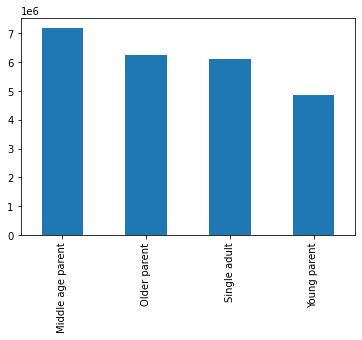

In [25]:
df_rel['Parent_Status'].value_counts().plot.bar()

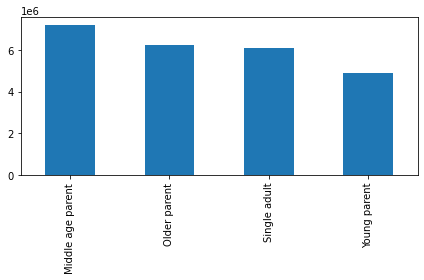

In [26]:
# creating a bar chart based on column "Parent Status" and saving it

bar=df_rel['Parent_Status'].value_counts().plot.bar()
plt.tight_layout()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_status.png'))

In [27]:
# find mean, min, max for prices of "Parent Status"

df_rel.groupby('Parent_Status').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
Parent_Status                         
Middle age parent  7.792145  1.0  25.0
Older parent       7.792533  1.0  25.0
Single adult       7.790987  1.0  25.0
Young parent       7.785727  1.0  25.0

In [28]:
# find mean, min, max for prices of "days_since_prior_order"

df_rel.groupby('Parent_Status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
Parent_Status                                      
Middle age parent              10.098064  0.0  30.0
Older parent                   10.092253  0.0  30.0
Single adult                   10.063515  0.0  30.0
Young parent                   10.083936  0.0  30.0

In [29]:
# creating crosstab between "Parent Status" and "Region"

crosstab_cust_region = pd.crosstab(df_rel['Parent_Status'], df_rel['Region'], dropna = False)

In [30]:
crosstab_cust_region

Region,Midwest,Northeast,South,West
Parent_Status,,,,
Middle age parent,1699907,1279309,2370031,1839784
Older parent,1438626,1109161,2081141,1611542
Single adult,1436736,1064991,2038001,1564382
Young parent,1135527,861222,1638610,1242196


In [31]:
crosstab_cust_region.to_clipboard()

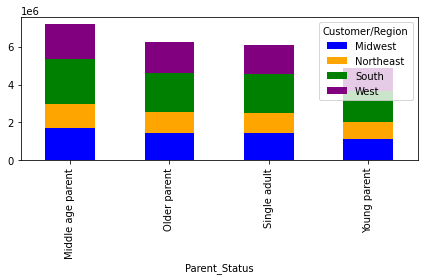

In [32]:
# plot and save bar char of crosstab

cust_region_bar = crosstab_cust_region.plot.bar(stacked=True, color=["blue", "orange", "green", "purple"])
plt.legend(title="Customer/Region")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regions.png'))

In [33]:
# creating crosstab

crosstab_cust_region = pd.crosstab(df_rel['department_id'], df_rel['Parent_Status'], dropna = False)

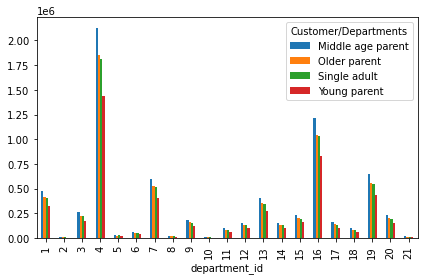

In [34]:
# plot and save bar chart of crosstab

cust_region_bar = crosstab_cust_region.plot.bar()
plt.legend(title="Customer/Departments")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_department.png'))

In [35]:
# creating a crosstab

crosstab_depend_depart = pd.crosstab(df_rel['department_id'], df_rel['Dependants'], dropna = False)

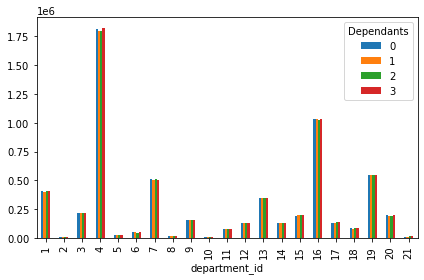

In [36]:
# plot and save bar chart of crosstab

depend_depart = crosstab_depend_depart.plot.bar()
plt.legend(title="Dependants")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_department.png'))

In [37]:
df_rel.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest/slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'freq_cust', 'Gender', 'State', 'Age',
       'Join date', 'Dependants', 'fam_status', 'Income', 'Region',
       'Relevance', 'Parent_Status'],
      dtype='object')

In [38]:
df_rel.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest/slowest days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,freq_cust,Gender,State,Age,Join date,Dependants,fam_status,Income,Region,Relevance,Parent_Status
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Relevant,Young parent


In [39]:
df_rel["busiest_period_of_day"].value_counts(dropna = False)

Most orders       15941595
Average orders     7502621
Fewest orders       966950
Name: busiest_period_of_day, dtype: int64

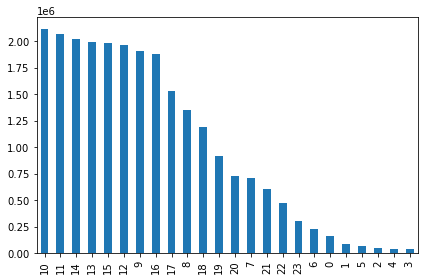

In [40]:
# creating a bar chart

bar_hour=df_rel['order_hour_of_day'].value_counts().plot.bar()
plt.tight_layout()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour.png'))

In [41]:
df_rel['product_name'].value_counts(dropna=False)

Banana                                                            358668
Bag of Organic Bananas                                            303632
Organic Strawberries                                              201955
Organic Baby Spinach                                              184749
Organic Hass Avocado                                              169658
                                                                   ...  
Satin Care Dry Skin Shave Gel for Women 7 Oz Female Shave Prep         1
Raisin Bran Crunch Apple & Strawberry Cereal                           1
Light Glass Bottles                                                    1
SmartBlend Lamb & Brown Rice Entree Wet Dog Food                       1
Lemon Verbena Air Freshener                                            1
Name: product_name, Length: 49400, dtype: int64

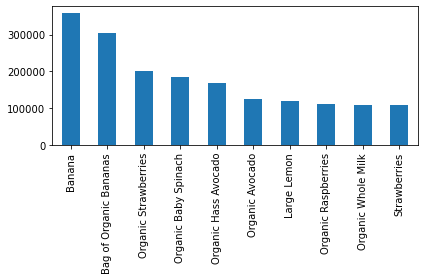

In [42]:
# creating a bar chart for the top 10 most bought products
prodspop = df_rel['product_name'].value_counts(dropna=False).nlargest(10).plot.bar()
plt.tight_layout()
prodspop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prodspop.png'))